# Prédire l’âge de l’ormeau à partir de mesures physiques

## Context

Prédire l’âge de l’ormeau à partir de mesures physiques. L’âge de l’ormeau est déterminé en coupant la coquille à travers le cône, en la colorant et en comptant le nombre d’anneaux à l’aide d’un microscope - une tâche ennuyeuse et longue. D’autres mesures, plus faciles à obtenir, sont utilisées pour prédire l’âge. Des informations supplémentaires, telles que les conditions météorologiques et l’emplacement (d’où la disponibilité de la nourriture) peuvent être nécessaires pour résoudre le problème.

Des exemples de données originaux avec des valeurs manquantes ont été supprimés (la majorité ayant la valeur prédite manquante), et les plages des valeurs continues ont été mises à l’échelle pour être utilisées avec un ANN (en divisant par 200).

## Import CSV

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv("../data/abalone.data")

In [27]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Encode column Sex

In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df['Sex'] = enc.fit_transform(df[['Sex']])

# 2.0 = Male
# 0.0 = Female
# 1.0 = Infant

In [50]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,1.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [30]:
df.info()
df.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   float64
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


False    4176
dtype: int64

No Nan No duplicates !

In [31]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,1.052682,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.822208,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


array([[<AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Length'}>],
       [<AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Shell weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Whole weight'}>]], dtype=object)

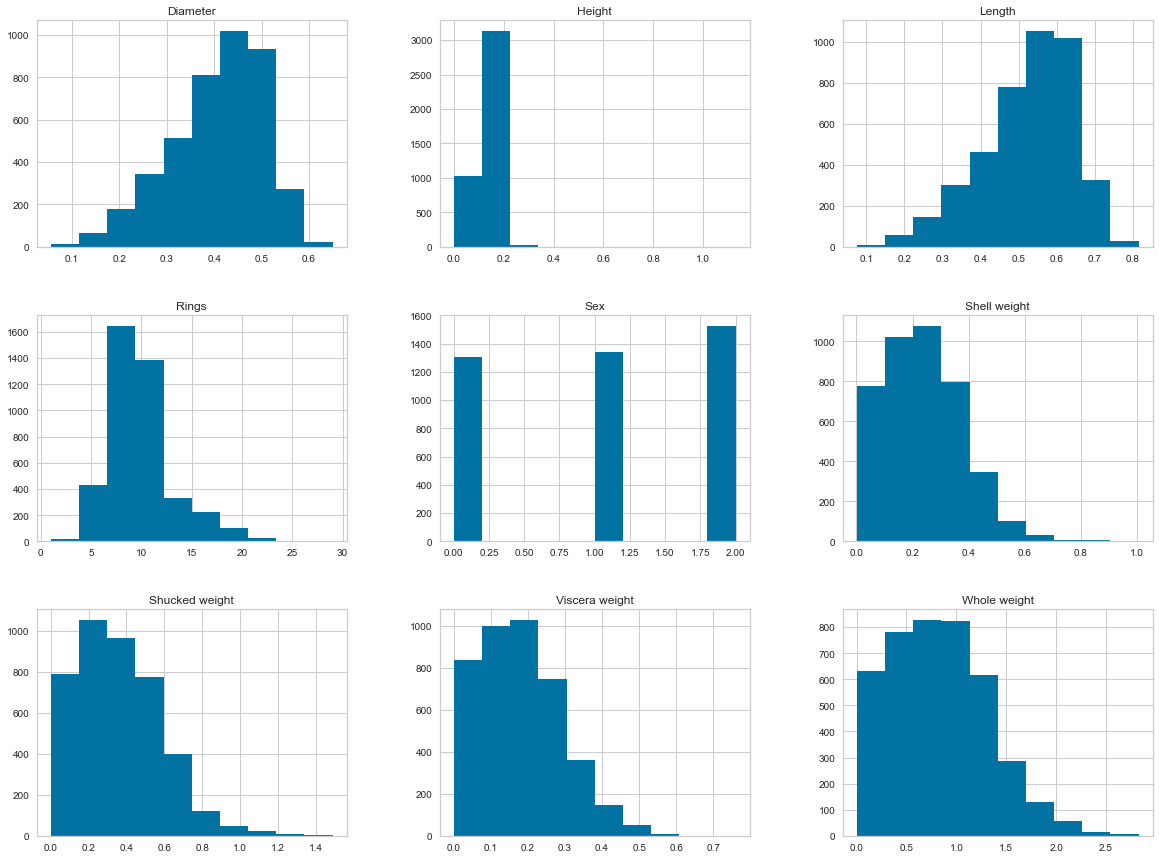

In [32]:
df.hist(figsize=(20,15))

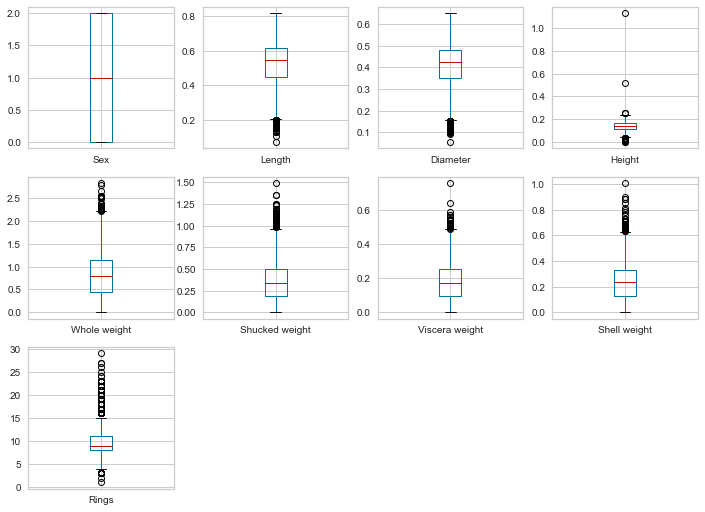

In [33]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize = (12, 12));

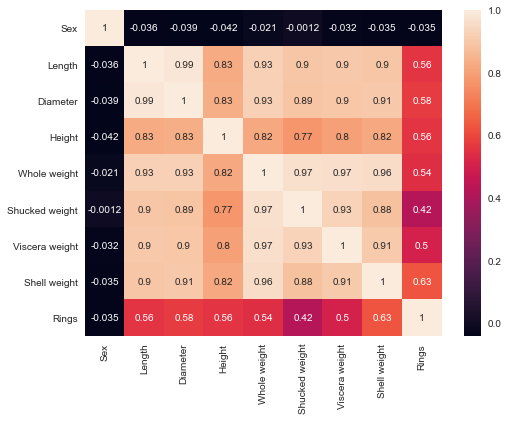

In [34]:
correlation = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True)
plt.show()

Il n'y as pas de très grande corrélations avec la target, Je pense à faire du clustering pour remédier à ce problème, il va aussi falloir enlever des features très coréllées entre elles 

## Features and Target

In [35]:
# Define Features and Target

X = df.drop(columns='Rings',axis=1)
y = df['Rings']

In [36]:
X.shape

(4176, 8)

In [37]:
y.shape

(4176,)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4, test_size=.2)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_test = X_test.values.reshape(3340,1)

# y_test= y_test.values.reshape(836,1)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

(3340, 8)
(3340,)
(836, 8)
(836,)


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('lr', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
Pipeline(steps=[('lr', LinearRegression())])
pipe.score(X_test, y_test)

0.5268266980920805

Voici notre dummyModel avec un r² très faible de 52%( Sans surprise vu la coréllation linéaire extremement faible.), essayons d'améliorer ce modèle !

Essayons un SGDRegressor comme le préconise ScikitLearn

In [41]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

# sgdPipe = Pipeline([('SGDR', SGDRegressor(SGDRegressor(max_iter=1000, tol=1e-3)))])
# sgdPipe.fit(X_train,y_train)
# pipe.score(X_test, y_test)

reg = make_pipeline(SGDRegressor())
reg.fit(X_train,y_train)

reg.score(X_test, y_test)

0.4875522705797638

Pas de résultat concluent non plus avec le SGDRegressor

Essayons du clustering

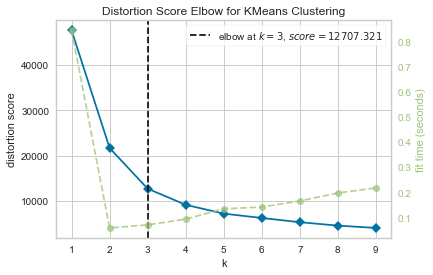

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
from sklearn.cluster import KMeans
#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer


# Generate synthetic dataset with 8 random clusters
to_clusterize = df.copy()

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(to_clusterize)        # Fit the data to the visualizer
visualizer.show()

3 cluster se distingue

In [43]:
# import pickle
kmeans = to_clusterize

kmeansed = KMeans(n_clusters =3,init='k-means++').fit(kmeans)
#pickle.dump(kmeansed, open('../DATA/kmean.sav', 'wb'))
kmeansed.labels_
kmeans['kmeans_cluster'] = kmeansed.predict(kmeans)


In [44]:
pd.set_option('display.max_rows', None)
clusterer = kmeans
clusterer.head()

# df['Full Date'] = df['Day'].map(str) + '-' + df['Month'].map(str) + '-' + df['Year'].map(str)
# print (df)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,kmeans_cluster
0,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
1,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1
2,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
3,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0
4,1.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0


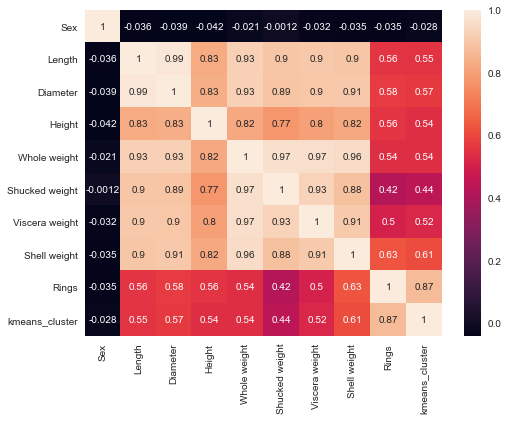

In [45]:
correlation = clusterer.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True)
plt.show()

Un peu mieux niveau regression, reessayons une regression le score devrait un peu augmenter


In [46]:
# Define Features and Target

XKmeans = clusterer.drop(columns='Rings',axis=1)
yKmeans = clusterer['Rings']
from sklearn.model_selection import train_test_split

X_traink, X_testk, y_traink, y_testk = train_test_split(XKmeans,yKmeans,random_state=4, test_size=.2)

In [47]:
X_traink.shape

(3340, 9)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeKmeans = Pipeline([('lr', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipeKmeans.fit(X_traink, y_traink)
Pipeline(steps=[('lr', LinearRegression())])
pipeKmeans.score(X_testk, y_testk)

0.8006425200661096

Grandde progression du score essayons un KNNRegressor

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

pipeKmeans2 = Pipeline([('lr', KNeighborsRegressor(n_neighbors=10))])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipeKmeans2.fit(X_traink, y_traink)
pipeKmeans2.score(X_testk, y_testk)



0.8413415814403369

C:\Users\Simplon\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Simplon\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Simplon\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Simplon\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\Simplon\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 711, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "C:\Use

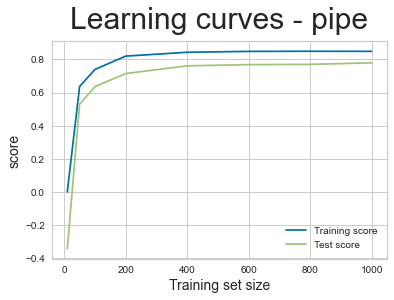

In [91]:
from sklearn.model_selection import learning_curve

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = pipeKmeans2,
                                          X = XKmeans,
                                          y = yKmeans,
                                          train_sizes = [5,10,50,100,200,400,600,800,1000],
                                          cv = 10,
                                          shuffle = True,
                                          random_state=3)
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - pipe', fontsize = 30, y = 1.03)
plt.legend()
plt.show()

C:\Users\Simplon\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Simplon\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Simplon\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Simplon\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\Simplon\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 711, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "C:\Use

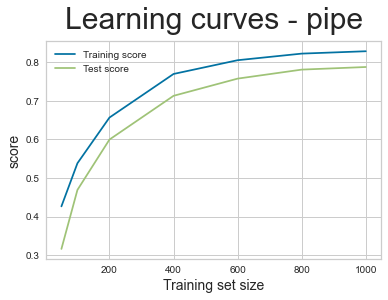

In [83]:
from sklearn.model_selection import learning_curve

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = pipeKmeans2,
                                          X = XKmeans,
                                          y = yKmeans,
                                          train_sizes = [5,10,50,100,200,400,600,800,1000],
                                          cv = 5,
                                          shuffle = True,
                                          random_state=3)
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - pipe', fontsize = 30, y = 1.03)
plt.legend()
plt.show()